# Explanation of the `golden_ratio_flower` Function

Inspired by Numberphile video on the Golden Ratio: https://www.youtube.com/watch?v=sj8Sg8qnjOg&t=311s. The `golden_ratio_flower` function generates a floral-like spiral pattern by iteratively rotating a point and scaling its distance outward at fixed intervals. Although the golden ratio is computed, it is not directly used in the algorithm. The function defines a rotation angle based on $\pi$, applies a 2D rotation matrix, and progressively increases the distance from the origin after a set number of rotations. The points are plotted as black dots, creating a pattern reminiscent of natural seed arrangements. The plot maintains equal axis scaling to preserve symmetry, resulting in an elegant, organic design.


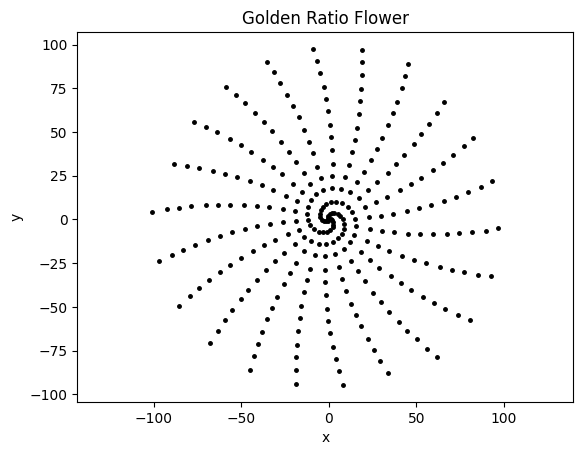

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def golden_ratio_flower():
    """
    Generates and plots a 'Golden Ratio Flower' pattern.
    
    This function computes seed positions by repeatedly rotating a point 
    and then scaling its magnitude after a fixed number of rotations.
    The resulting set of points produces a spiral flower-like pattern,
    similar to natural seed arrangements.
    """
    # Although the golden ratio is computed here, it is not used in the algorithm.
    phi = (1 + np.sqrt(5)) / 2.0

    # Set the number of rotations before scaling.
    # The original code used NTURNS = np.pi (a float), but for counter comparisons we need an integer.
    rotations = int(np.pi)  # This is equivalent to 3
    
    # Total number of seeds to generate.
    NTRIES = rotations * 100  # Increase multiplier for a denser pattern.
    
    # Compute the rotation angle in radians.
    # Originally, the angle was calculated as 360/NTURNS (with NTURNS=np.pi).
    # Here we mimic that by using np.pi in the calculation.
    theta_deg = 360.0 / np.pi  # Angle in degrees.
    theta = theta_deg * np.pi / 180.0  # Convert degrees to radians.
    
    # Create the 2D rotation matrix for the computed angle.
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    
    # Initialize lists for x and y coordinates.
    x = [1.0]  # Start at (1, 0)
    y = [0.0]
    
    # Define the scaling parameters.
    L = 1.0  # Current scaling factor (seed distance from origin)
    D = 1.0  # Increment to apply to L after each complete set of rotations.
    count = 0  # Counter to track the number of rotations since the last scaling.
    
    # Generate seed positions.
    for i in range(NTRIES):
        # Rotate the previous point using the rotation matrix.
        current_point = np.array([x[i], y[i]])
        new_point = np.dot(R, current_point)
        count += 1
        
        # After a fixed number of rotations, scale the new point so seeds spread out.
        if count >= rotations:
            count = 0
            L += D
            # Normalize new_point and scale it to have length L.
            norm = np.sqrt(new_point[0]**2 + new_point[1]**2)
            if norm == 0:
                norm = 1  # safeguard against division by zero
            new_point = (L * new_point) / norm
        
        # Append the computed coordinates.
        x.append(new_point[0])
        y.append(new_point[1])
    
    # Create a new figure and plot the generated points.
    plt.figure()
    plt.plot(x, y, 'k.', markersize=5)  # 'k.' plots small black dots.
    plt.axis('equal')  # Ensure equal scaling on both axes.
    plt.title("Golden Ratio Flower")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Call the function to generate and display the plot.
golden_ratio_flower()

In [ ]:
#Golden Angle - www.101computing.net/golden-angle
import turtle
import time

def drawCircle(x, y, radius, color):
    global myPen
    myPen.setheading(0)
    myPen.penup()
    myPen.color(color)
    myPen.fillcolor(color)
    myPen.goto(x,y-radius)
    myPen.begin_fill()
    myPen.circle(radius)
    myPen.end_fill()
    myPen.pendown()
    
myPen = turtle.Turtle()
myPen.hideturtle()
myPen.speed(0)

#Draw Trunc
drawCircle(0, 0, 20 , "#705623")

myPen.goto(0,0)
myPen.width(4)
goldenAngle=137.5
myPen.setheading(90)

for branch in range(0,50):
  #Draw Branch
  myPen.forward(150)
  myPen.forward(-150)
  myPen.right(goldenAngle)
  time.sleep(1)

In [6]:
# Spiral Phyllotaxis Demo
#
# Example for VSFX 705
# Turtle Sunflowers - Introduce Phyllotactic Pattern
#
# Author: Deborah R. Fowler
#
# March 21, 2013
# Based on original code in C 1989 using Silicon Graphics Workstations and gl
import math
import turtle

def drawPhyllotacticPattern(turtle, t, petalstart, angle = 137.508, size = 2, cspread = 4 ):
    """print a pattern of circles using spiral phyllotactic data"""
    # initialize position
    # turtle.pen(outline=1,pencolor="black",fillcolor="orange")
    turtle.color('black')
    turtle.fillcolor("orange")
    phi = angle * ( math.pi / 180.0 )
    xcenter = 0.0
    ycenter = 0.0
   
    # for loops iterate in this case from the first value until < 4, so
    for n in range (0,t):
        r = cspread * math.sqrt(n)
        theta = n * phi
        
        x = r * math.cos(theta) + xcenter
        y = r * math.sin(theta) + ycenter

        # move the turtle to that position and draw 
        turtle.up()
        turtle.setpos(x,y)
        turtle.down()
        # orient the turtle correctly
        turtle.setheading(n * angle)
        if n > petalstart-1:
            turtle.color("yellow")
            drawPetal(turtle,x,y)
        else: turtle.stamp()
            

def drawPetal(turtle, x, y ):
    turtle.penup()
    turtle.goto(x,y)
    turtle.pendown()
    turtle.color('black')
    turtle.fillcolor('yellow')
    turtle.begin_fill()
    turtle.right(20)
    turtle.forward(70)
    turtle.left(40)
    turtle.forward(70)
    turtle.left(140)
    turtle.forward(70)
    turtle.left(40)
    turtle.forward(70)
    turtle.penup()
    turtle.end_fill() # this is needed to complete the last petal


tina = turtle.Turtle()
tina.shape("turtle")
tina.speed(0) # make the turtle go as fast as possible
drawPhyllotacticPattern(tina, 200, 160, 137.508 )
tina.penup()
tina.forward(1000)
# tina.exitonclick() # lets you x out of the window when outside of idle


TclError: invalid command name ".!canvas"